<a href="https://colab.research.google.com/github/rkaunismaa/StableDiffusion/blob/main/examples/SemanticGuidance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monday, February 27, 2023

# Semantic Guidance

This is a demonstration of the Semantic Guidance(Sega) approach for diffusion models. Sega enables interacting with concept retained by generative text-to-image models. Find the paper on [arXiv](https://arxiv.org/abs/2301.12247) and our official implementation on [GitHub](https://github.com/ml-research/semantic-image-editing).



In [1]:
# @title First install depencendies
!pip install git+https://github.com/ml-research/semantic-image-editing &> /dev/null
!pip install ftfy &> /dev/null

Afterwards, make sure to restart your notebook for the import to take effect
## Setup Pipeline
Now load the SemanticEditPipeline which inherits from [diffusers][https://github.com/huggingface/diffusers] ```DiffusionPipeline```. Our pipeline is compatible with any Stable Diffusion checkpoint.

In [2]:
from semdiffusers import SemanticEditPipeline
import torch
device='cuda'

pipe = SemanticEditPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    
    safety_checker=None,
).to(device)
gen = torch.Generator(device=device)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/semdiffusers/pipeline_latent_edit_diffusion.py:79: UserWarning: You have disabled the safety checker for <class 'semdiffusers.pipeline_latent_edit_diffusion.SemanticEditPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
  warn

### Import and utils

import libraries we will need later on and define some utility functions

In [3]:
from PIL import Image
def image_grid(imgs, rows, cols, spacing = 20):
    assert len(imgs) == rows * cols
    
    w, h = imgs[0].size
    
    grid = Image.new('RGBA', size=(cols * w + (cols-1)*spacing, rows * h + (rows-1)*spacing ), color=(255,255,255,0))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=( i // rows * (w+spacing), i % rows * (h+spacing)))
        #print(( i // rows * w, i % rows * h))
    return grid

## General Examples 
Subsequently, we will explore the examples presented in the paper.

Below are all examples presented in Fig. 1. These cover a wide range of tasks and capabilities of SEGA.

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

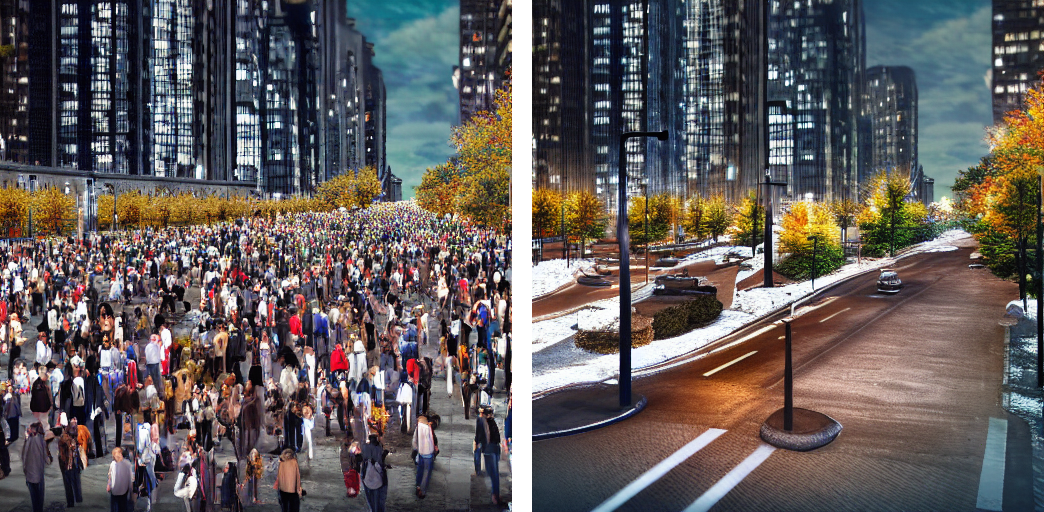

In [4]:
target = {'editing_prompt': 'crowd, crowded, people', 'reverse_editing_direction':True, 'edit_warmup_steps':10
          , 'edit_guidance_scale':8.3, 'edit_threshold':0.9, 'edit_momentum_scale':0.5, 'edit_mom_beta': 0.6}

seed = 9
prompt = 'an image of a crowded boulevard, realistic, 4k'
gen.manual_seed(seed)
org = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7)

gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7,
       **target)

image_grid((org.images[0], out.images[0]), rows=1, cols=2)

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

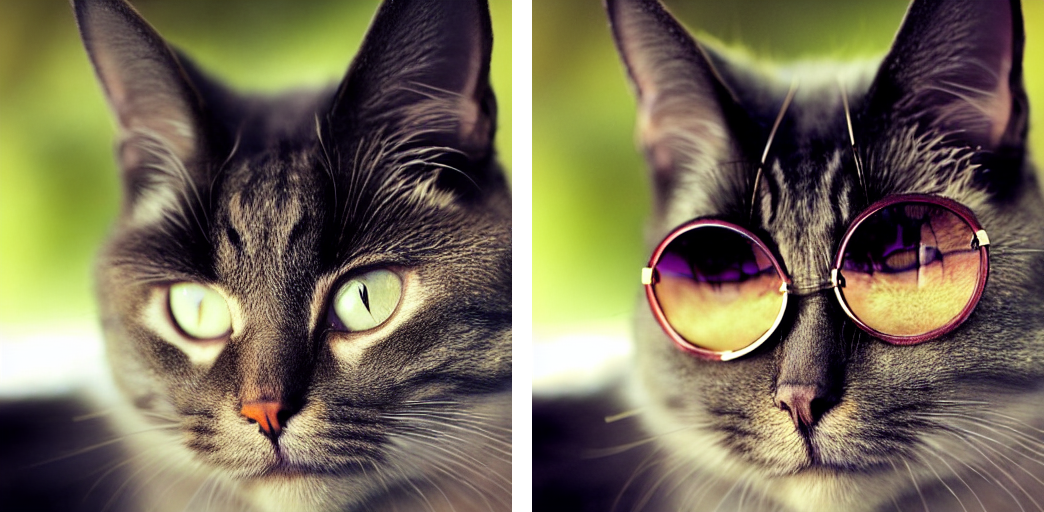

In [5]:
target = {'editing_prompt': ['sunglasses'], 'reverse_editing_direction':[False], 
          'edit_warmup_steps':10, 'edit_guidance_scale':6, 'edit_threshold':0.95, 'edit_momentum_scale':0.5, 'edit_mom_beta': 0.6}

seed = 3
prompt = 'a photo of a cat'
gen.manual_seed(seed)
org = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7)

gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7,
       **target)

image_grid((org.images[0], out.images[0]), rows=1, cols=2)

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

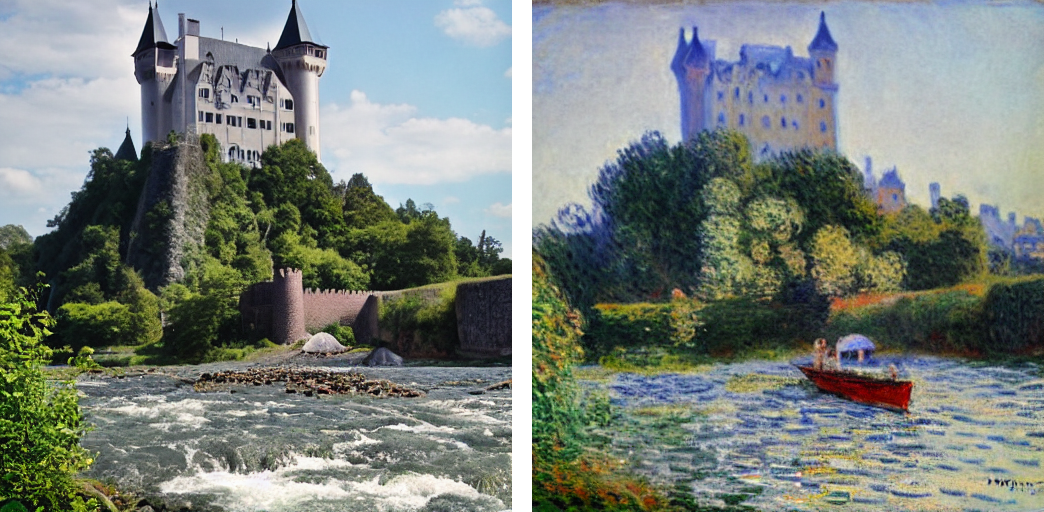

In [6]:
target = {'editing_prompt': ['boat on a river, boat','monet, impression, sunrise'], 'reverse_editing_direction':False, 
          'edit_warmup_steps':[15,18], 'edit_guidance_scale':6, 'edit_threshold':[0.9, 0.8], 'edit_momentum_scale':0.5, 'edit_mom_beta': 0.6}

seed = 48
prompt = 'a castle next to a river'
gen.manual_seed(seed)
org = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7)

gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7,
       **target)

image_grid((org.images[0], out.images[0]), rows=1, cols=2)

In [7]:
target = {'editing_prompt': ['smiling, smile', 'makeup, heavy makeup, red lips, eye shadow', 'wearing hat, hat', 'female person', 'male person'], 
          'reverse_editing_direction':[True, False, False, False, True], 'edit_warmup_steps':8
      , 'edit_guidance_scale':[0,4,6,3,7], 'edit_threshold':[0.95, 0.95, 0.95, 0.95, 0.95], 'edit_momentum_scale':0.5, 'edit_mom_beta': 0.6}

seed = 145
prompt = 'a photo of the face of a random person'
gen.manual_seed(seed)
org = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7)

gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7,
       **target)

image_grid((org.images[0], out.images[0]), rows=1, cols=2)

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

OutOfMemoryError: ignored

### Monotonicity 

The magnitude of a semantic concept in an image scales monotonically with the strength of the semantic guidance vector. Below we can observe the effect of increasing the strength of semantic guidance $s_e$. Both for positive and negative guidance, the change in scale correlates with the strength of the smile or frown.
Consequently, any changes to a generated image can be steered intuitively using only the semantic guidance scale $e_$ and warm-up period $\delta$. This level of control over the generation process is also applicable to multiple concepts with arbitrary combinations of the desired strength of the edit per concept

In [ ]:
prompt = 'a photo of the face of a random person'
root = './data/face_attributes/'
seed = 7
images = []
for x in [10,6,3,1.5]:
    target = {'editing_prompt': ['smile, smiling'], 'reverse_editing_direction':[True], 'edit_warmup_steps':10, 'edit_guidance_scale':x, 'edit_threshold':0.975, 'edit_momentum_scale':0.5, 'edit_mom_beta': 0.6}
    gen.manual_seed(seed)
    out = pipe(prompt, generator=gen, guidance_scale=7, num_images_per_prompt=1, **target)
    images.extend(out.images)
    
gen.manual_seed(seed)
out = pipe(prompt, generator=gen, guidance_scale=7, num_images_per_prompt=1)
tmp = out.images[0]

images.extend(out.images)

for x in [1.5,3,6,10]:
    target = {'editing_prompt': ['smile, smiling'], 'reverse_editing_direction':[False], 'edit_warmup_steps':10, 'edit_guidance_scale':x, 'edit_threshold':0.975, 'edit_momentum_scale':0.5, 'edit_mom_beta': 0.6}
    gen.manual_seed(seed)
    out = pipe(prompt, generator=gen, guidance_scale=7, num_images_per_prompt=1, **target)
    images.extend(out.images)
    
image_grid(images, 1, len(images))

## Vector arithmetics

Demonstrating that king - male + female = Queen with Sega vectors as shown in Fig 2.

In [ ]:
target = {'editing_prompt': ['male', 'female'], 
          'reverse_editing_direction':[True, False, False, False, True], 'edit_warmup_steps':5
      , 'edit_guidance_scale':5, 'edit_threshold':0.9, 'edit_momentum_scale':0.5, 'edit_mom_beta': 0.6}

seed = 33
prompt = 'a portrait of a king, full body shot, 8k'
gen.manual_seed(seed)
org = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7)

gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7,
       **target)

image_grid((org.images[0], out.images[0]), rows=1, cols=2)

## Robustness of guidance vectors

The depicted examples showcase how SEGA extracts best-effort integration of the target concept into the original image that is semantically grounded. This makes SEGA’s use easy and provides the same exploratory nature as the initial image generation.

In [ ]:
images = []

target = {'editing_prompt': ['glasses'], 'reverse_editing_direction':[False], 'edit_warmup_steps':15, 'edit_guidance_scale':5, 'edit_threshold':0.99, 'edit_momentum_scale':0.35, 'edit_mom_beta': 0.6}
seed = 5
prompt = 'a photo of the face of a gorgeous woman'
gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7)
images.extend(out.images)

gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7,
       **target)
images.extend(out.images)


target = {'editing_prompt': ['glasses'], 'reverse_editing_direction':[False], 'edit_warmup_steps':12, 'edit_guidance_scale':7, 'edit_threshold':0.98, 'edit_momentum_scale':0.35, 'edit_mom_beta': 0.6}
seed = 2
prompt = 'a photo of a corgi'
gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7)
images.extend(out.images)

gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7,
       **target)
images.extend(out.images)


target = {'editing_prompt': ['glasses'], 'reverse_editing_direction':[False], 'edit_warmup_steps':12, 'edit_guidance_scale':5, 'edit_threshold':0.975, 'edit_momentum_scale':0.35, 'edit_mom_beta': 0.6}
seed = 2
prompt = 'a photo of a flowerpot'
gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7)
images.extend(out.images)

gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7,
       **target)
images.extend(out.images)

target = {'editing_prompt': ['glasses'], 'reverse_editing_direction':[False], 'edit_warmup_steps':10, 'edit_guidance_scale':8.5, 'edit_threshold':0.85, 'edit_momentum_scale':0.5, 'edit_mom_beta': 0.6}
seed = 11
prompt = 'a photo of a frog'
gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7)
images.extend(out.images)

gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7,
       **target)
images.extend(out.images)


image_grid(images, rows=2, cols=int(len(images)/2))

## Uniqueness of guidance vectors

Guidance vectors $\gamma$ of one concept are unique and can thus be calculated once and subsequently applied to other images. The images generated below show an example for which we computed the semantic guidance for ‘glasses’ on the leftmost image and simply added the vector in the diffusion process of other prompts. All faces are generated wearing glasses without a respective $\epsilon$-estimate required. This even covers significant domain shifts, as seen in the one switching from photo-realism to drawings.

In [ ]:
prompt = 'a photo of the face of a random person'

root = './images/uniqueness/glasses/'
other_prompts = [
    'a photo of the face of a girl',
    'a photo of the face of an actor',
    'A photo of a person, in the style of a cartoon, drawing',
    'a photo of the face of a boy',
    'a photo of the face of Emma Watson',
    'a photo of the face of the president',
]

target = {'editing_prompt': ['glasses'], 'reverse_editing_direction':[False], 'edit_warmup_steps':12, 'edit_guidance_scale':7, 'edit_threshold':0.95, 'edit_momentum_scale':0.35, 'edit_mom_beta': 0.6}

i = 2
images = []

gen.manual_seed(i)
out = pipe(prompt, generator=gen, guidance_scale=7, num_images_per_prompt=1)
images.extend(out.images)



gen.manual_seed(i)
out = pipe(prompt, generator=gen, guidance_scale=7, num_images_per_prompt=1, **target)
images.extend(out.images)

sem_guidance = pipe.sem_guidance
for prompt in other_prompts:
    #images = []
    if 'Emma' in prompt or 'Jonny' in prompt:
        scale = 3
    else:
        scale = 7
        
    gen.manual_seed(i)
    out = pipe(prompt, generator=gen, guidance_scale=scale, num_images_per_prompt=1)
    images.extend(out.images)
    
    gen.manual_seed(i)
    out = pipe(prompt, generator=gen, guidance_scale=scale, num_images_per_prompt=1, sem_guidance=sem_guidance)
    images.extend(out.images)
    
    
image_grid(images, 2, int(len(images)/2))

## Isolation of Guidance vectors

Different concepts are largely isolated because each concept vector requires only a fraction of the total noise estimate. Meaning that different vectors do not interfere with each other. Thus, multiple concepts can be applied to the same image simultaneously, as shown in below. We can see, for example, that the glasses which were added first remain unchanged with subsequently added edits. We can utilize this behavior to perform more complex changes, best expressed using multiple concepts.

In [ ]:
seed = 21


prompt = 'a photo of the face of a woman'
images = []
gen.manual_seed(seed)
out = pipe(prompt, generator=gen, guidance_scale=7, num_images_per_prompt=1, )
images.extend(out.images)

target = {'editing_prompt': ['smiling, smile', 'glasses, wearing glasses', 'curls, wavy hair, curly hair', 'beard, full beard, mustache'], 'reverse_editing_direction':False, 'edit_warmup_steps':10
          , 'edit_guidance_scale':[0,5,0,0], 'edit_threshold':[0.99, 0.975, 0.925, 0.96], 'edit_momentum_scale':0.3, 'edit_mom_beta': 0.6}
gen.manual_seed(seed)
out = pipe(prompt, generator=gen, guidance_scale=7, num_images_per_prompt=1, **target)
images.extend(out.images)

target = {'editing_prompt': ['smiling, smile', 'glasses, wearing glasses', 'curls, wavy hair, curly hair', 'beard, full beard, mustache'], 'reverse_editing_direction':False, 'edit_warmup_steps':10
          , 'edit_guidance_scale':[6,5,0,0], 'edit_threshold':[0.99, 0.975, 0.925, 0.96], 'edit_momentum_scale':0.3, 'edit_mom_beta': 0.6}
gen.manual_seed(seed)
out = pipe(prompt, generator=gen, guidance_scale=7, num_images_per_prompt=1, **target)
images.extend(out.images)

target = {'editing_prompt': ['smiling, smile', 'glasses, wearing glasses', 'curls, wavy hair, curly hair', 'beard, full beard, mustache'], 'reverse_editing_direction':False, 'edit_warmup_steps':10
          , 'edit_guidance_scale':[6,5,5,0], 'edit_threshold':[0.99, 0.975, 0.925, 0.96], 'edit_momentum_scale':0.3, 'edit_mom_beta': 0.6}
gen.manual_seed(seed)
out = pipe(prompt, generator=gen, guidance_scale=7, num_images_per_prompt=1, **target)
images.extend(out.images)

target = {'editing_prompt': ['smiling, smile', 'glasses, wearing glasses', 'curls, wavy hair, curly hair', 'beard, full beard, mustache'], 'reverse_editing_direction':False, 'edit_warmup_steps':10
          , 'edit_guidance_scale':[4,5,5,5.4], 'edit_threshold':[0.99, 0.975, 0.925, 0.96], 'edit_momentum_scale':0.3, 'edit_mom_beta': 0.6}
gen.manual_seed(seed)
out = pipe(prompt, generator=gen, guidance_scale=7, num_images_per_prompt=1, **target)
images.extend(out.images)

image_grid(images, 1, len(images))